# Perceptron Multicapa: Caso Práctico III - Sonido

## Enunciado

El objetivo del ejercicio consiste en utilizar un perceptron multicapa para identificación de la persona que se encuentra hablando apartir de un audio de un segudo de duración

In [7]:
# Definimos un conjunto de constantes con las rutas de las carpetas que contienen los audios de cada persona
import os

DATASET_ROOT = "16000_pcm_speeches"
BENJAMIN_DATA = os.path.join(DATASET_ROOT, "Benjamin_Netanyau")
JENS_DATA = os.path.join(DATASET_ROOT, "Jens_Stoltenberg")
JULIA_DATA = os.path.join(DATASET_ROOT, "Julia_Gillard")
MARGARET_DATA = os.path.join(DATASET_ROOT, "Magaret_Tarcher")
NELSON_DATA = os.path.join(DATASET_ROOT, "Nelson_Mandela")

## 1. Preparación del conjunto de datos

In [11]:
# Definimos una función para parsear nuestro conjunto de datos
import librosa
import numpy as np

def parse_dataset(dataset_paths):
    X = []
    y = []
    for index, dataset in enumerate(dataset_paths):
        print("[+] Parsing {} data...".format(dataset))
        for fname in os.listdir(dataset):
            wav, sr = librosa.load(os.path.join(dataset, fname), sr=None)
            D = librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max)
            X.append(D)
            y.append(index)
    return (X, y)

In [12]:
X, y = parse_dataset([BENJAMIN_DATA, JENS_DATA, JULIA_DATA, MARGARET_DATA, NELSON_DATA])

[+] Parsing 16000_pcm_speeches\Benjamin_Netanyau data...
[+] Parsing 16000_pcm_speeches\Jens_Stoltenberg data...
[+] Parsing 16000_pcm_speeches\Julia_Gillard data...
[+] Parsing 16000_pcm_speeches\Magaret_Tarcher data...
[+] Parsing 16000_pcm_speeches\Nelson_Mandela data...


## 2. División del conjunto de datos

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [14]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [24]:
print('Logitud subconjunto de entrenamiento: ', len(X_train))
print('Logitud subconjunto de validación: ', len(X_val))
print('Logitud subconjunto de pruebas: ', len(X_test))

Logitud subconjunto de entrenamiento:  6750
Logitud subconjunto de validación:  376
Logitud subconjunto de pruebas:  375


In [26]:
y_train

[1,
 0,
 0,
 4,
 3,
 3,
 3,
 0,
 0,
 4,
 2,
 0,
 2,
 0,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 3,
 4,
 2,
 4,
 2,
 3,
 2,
 2,
 2,
 4,
 0,
 3,
 1,
 3,
 1,
 4,
 1,
 4,
 2,
 4,
 2,
 4,
 1,
 4,
 0,
 3,
 2,
 4,
 4,
 3,
 3,
 0,
 0,
 4,
 1,
 3,
 0,
 0,
 4,
 2,
 0,
 2,
 1,
 3,
 4,
 0,
 2,
 4,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 4,
 2,
 4,
 0,
 2,
 0,
 3,
 0,
 4,
 4,
 3,
 4,
 3,
 2,
 4,
 1,
 3,
 4,
 3,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 0,
 0,
 4,
 3,
 1,
 1,
 4,
 3,
 4,
 4,
 0,
 4,
 4,
 3,
 4,
 3,
 3,
 1,
 3,
 3,
 4,
 2,
 3,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 3,
 2,
 3,
 2,
 4,
 3,
 1,
 1,
 3,
 3,
 4,
 2,
 1,
 1,
 4,
 0,
 3,
 0,
 2,
 2,
 0,
 2,
 4,
 4,
 3,
 4,
 1,
 4,
 0,
 3,
 2,
 1,
 4,
 1,
 0,
 1,
 1,
 3,
 3,
 0,
 2,
 4,
 0,
 2,
 1,
 1,
 4,
 0,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 0,
 2,
 2,
 3,
 0,
 2,
 3,
 3,
 2,
 4,
 0,
 0,
 1,
 3,
 2,
 3,
 3,
 4,
 4,
 4,
 1,
 4,
 0,
 0,
 1,
 3,
 4,
 0,
 4,
 4,
 4,
 1,
 2,
 4,
 2,
 0,
 4,
 1,
 3,
 0,
 1,
 0,
 3,
 0,
 2,
 3,
 0,
 2,
 4,
 4,
 1,
 4,
 1,
 4,
 4,
 2,
 1,
 3,
 0,
 0,


## 3. Construcción del modelo

In [19]:
from tensorflow.keras.utils import to_categorical

def prep_dataset(X, y, shape):
    X_prep = np.array(X).reshape((len(X), shape))
    X_prep = X_prep.astype('float32') / 255
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

In [20]:
X_train_prep, y_train_prep = prep_dataset(X_train, y_train, 1025*32)
X_val_prep, y_val_prep = prep_dataset(X_val, y_val, 1025*32)
X_test_prep, y_test_prep = prep_dataset(X_test, y_test, 1025*32)

In [21]:
X_train_prep

array([[-0.3137255 , -0.3137255 , -0.3137255 , ..., -0.3137255 ,
        -0.3137255 , -0.3137255 ],
       [-0.16717811, -0.23272483, -0.16244128, ..., -0.3137255 ,
        -0.24306963, -0.20336972],
       [-0.08208626, -0.10544308, -0.26605114, ..., -0.3137255 ,
        -0.29102874, -0.25699046],
       ...,
       [-0.15331335, -0.14942494, -0.14044005, ..., -0.3137255 ,
        -0.26202756, -0.22259411],
       [-0.14048211, -0.19062725, -0.16913226, ..., -0.3137255 ,
        -0.3137255 , -0.29985636],
       [-0.16147251, -0.17320623, -0.20554182, ..., -0.3137255 ,
        -0.3137255 , -0.3137255 ]], dtype=float32)

In [22]:
y_train_prep

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

### 3.1 Entrenamiento de una RNA sencilla

In [27]:
# Entrenamos un perceptrón multicapa 
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')
clf.fit(X_train_prep, y_train)

C:\Users\luigi\.conda\envs\curso_deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')

In [28]:
# Realizamos la predicción con el conjunto de datos de validación
y_pred = clf.predict(X_val_prep)

In [29]:
# Mostramos el accuracy resultante de la clasificación 
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.8723404255319149

### 3.2 Entrenamiento de una RNA profunda

In [34]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [35]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(1025*32,)))
network.add(layers.Dense(200, activation='relu'))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(5, activation='softmax'))

In [36]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])

In [37]:
history = network.fit(X_train_prep, 
                      y_train_prep,
                      epochs=30,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/30
211/211 [==============================] - 14s 63ms/step - loss: 1.3684 - accuracy: 0.3923 - precision: 0.7167 - val_loss: 1.0638 - val_accuracy: 0.5293 - val_precision: 0.8052
Epoch 2/30
211/211 [==============================] - 13s 59ms/step - loss: 1.0479 - accuracy: 0.5693 - precision: 0.7451 - val_loss: 0.8502 - val_accuracy: 0.6436 - val_precision: 0.7633
Epoch 3/30
211/211 [==============================] - 12s 58ms/step - loss: 0.8629 - accuracy: 0.6467 - precision: 0.7719 - val_loss: 0.6122 - val_accuracy: 0.8085 - val_precision: 0.9141
Epoch 4/30
211/211 [==============================] - 12s 59ms/step - loss: 0.7381 - accuracy: 0.7073 - precision: 0.7876 - val_loss: 0.7363 - val_accuracy: 0.6569 - val_precision: 0.7593
Epoch 5/30
211/211 [==============================] - 18s 84ms/step - loss: 0.6489 - accuracy: 0.7502 - precision: 0.8064 - val_loss: 0.6554 - val_accuracy: 0.7766 - val_precision: 0.8434
Epoch 6/30
211/211 [==============================] - 15s 69

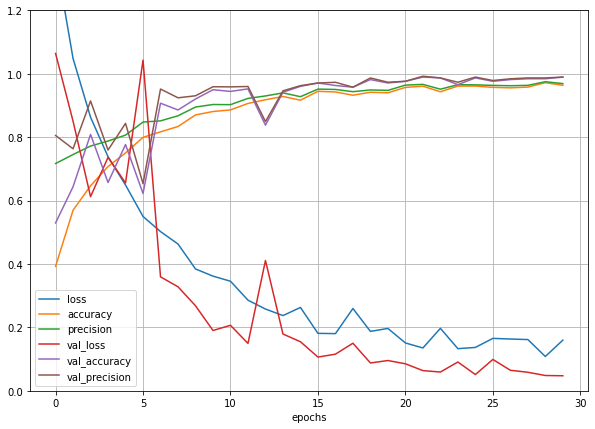

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel('epochs')
plt.show()

### 3.3. Predicción para nuevos ejemplos

In [40]:
# Realizamos la predicción para el subconjunto de pruebas
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

12/12 [==============================] - 1s 39ms/step - loss: 0.0843 - accuracy: 0.9760 - precision: 0.9786


In [41]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.9760000109672546
test_prec: 0.9785522818565369
